In [179]:
using Images, ImageFiltering, FileIO, ImageView, ImageMorphology, ColorTypes, ImageDraw, Colors

ArgumentError: ArgumentError: Package ImageFiltering not found in current path, maybe you meant `import/using .ImageFiltering`.
- Otherwise, run `import Pkg; Pkg.add("ImageFiltering")` to install the ImageFiltering package.

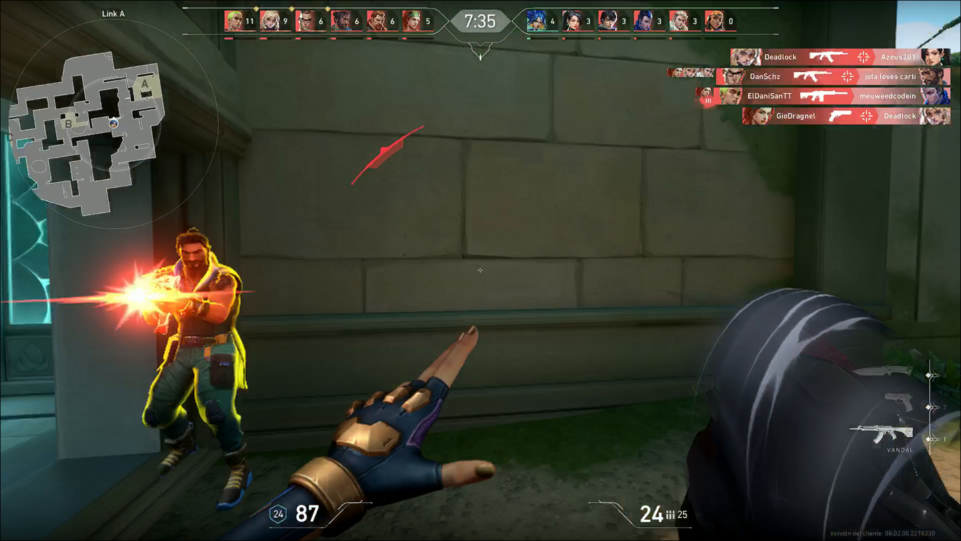

In [180]:
img = load("Frames/edition1/frame23_194.png")

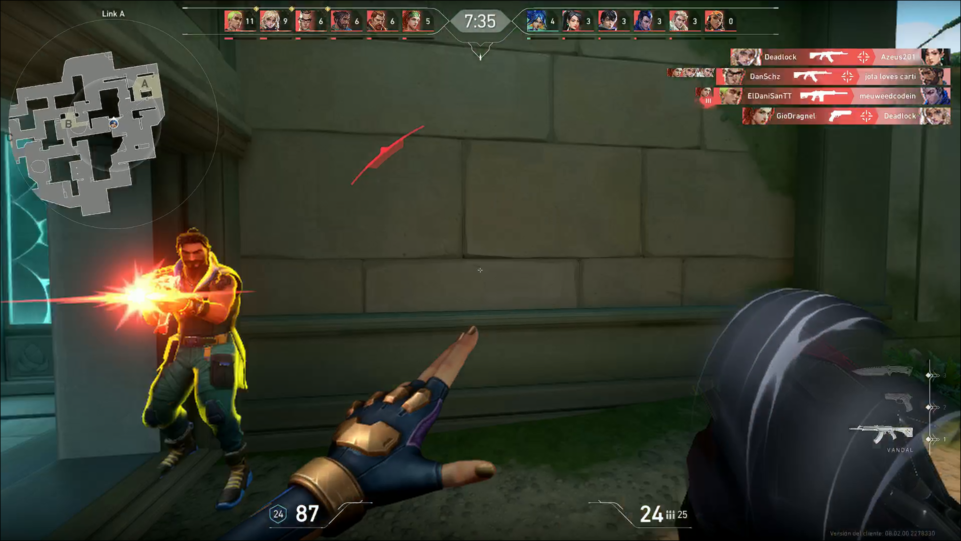

In [181]:
img_hsv = HSV.(img)

In [182]:
# Define the yellow color range in HSV, ensuring the type matches img_hsv pixels
yellow_low = HSV{Float32}(40, 100/255, 155/255)


In [183]:
yellow_high = HSV{Float32}(71, 255/255, 255/255)

In [184]:
mask = map(img_hsv) do pixel
    h, s, v = pixel.h, pixel.s, pixel.v
    h_low, s_low, v_low = yellow_low.h, yellow_low.s, yellow_low.v
    h_high, s_high, v_high = yellow_high.h, yellow_high.s, yellow_high.v

    h_in_range = h_low <= h <= h_high
    s_in_range = s_low <= s <= s_high
    v_in_range = v_low <= v <= v_high

    return h_in_range && s_in_range && v_in_range ? 1 : 0
end

1080×1920 Matrix{Int64}:
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 ⋮              ⋮              ⋮        ⋱        ⋮              ⋮           
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  

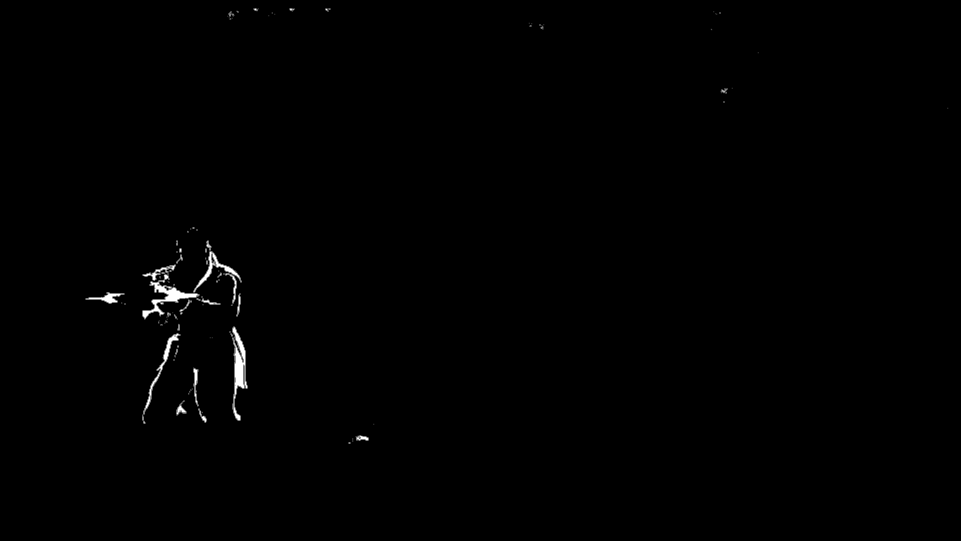

In [185]:
# Convert mask to grayscale image for morphological operations
mask_gray = Gray.(mask)

In [186]:
se = centered(Bool[
    0 0 1 1 1 0 0
    0 1 1 1 1 1 0
    1 1 1 1 1 1 1
    1 1 1 1 1 1 1
    1 1 1 1 1 1 1
    0 1 1 1 1 1 0
    0 0 1 1 1 0 0
])

se2 = centered(Bool[
    0 0 1 0 0  
    0 1 1 1 0  
    1 1 1 1 1  
    0 1 1 1 0 
    0 0 1 0 0 
])

5×5 OffsetArray(::Matrix{Bool}, -2:2, -2:2) with eltype Bool with indices -2:2×-2:2:
 0  0  1  0  0
 0  1  1  1  0
 1  1  1  1  1
 0  1  1  1  0
 0  0  1  0  0

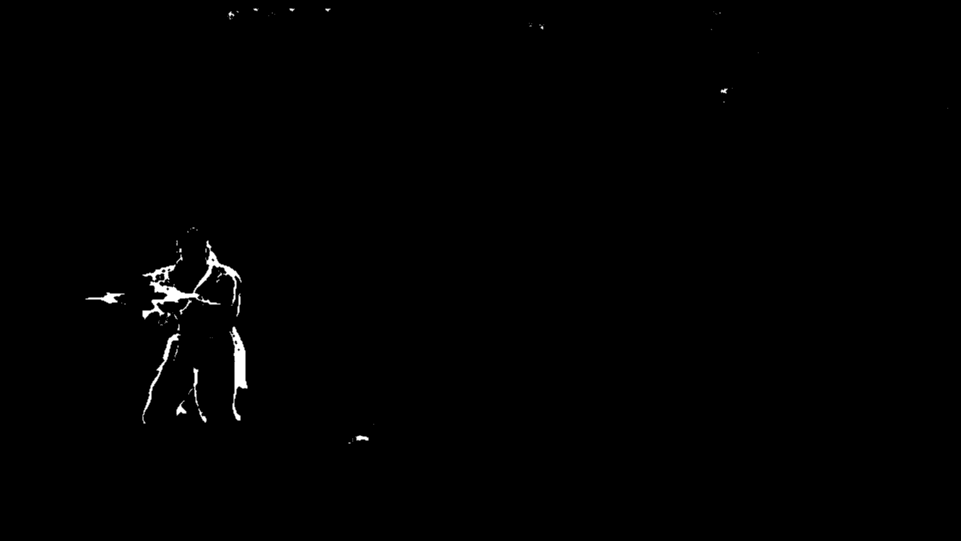

In [187]:
#img_erode = @. Gray(mask_gray < 0.1); # keeps white objects white
img_erosion1 = closing(mask_gray,se2)

In [188]:

function bounding_boxes(mask::Array{T, 2}) where {T}
    # Encontrar los objetos en la máscara binaria
    objects = label_components(mask)
    
    # Inicializar un vector para almacenar los bounding boxes de cada objeto
    bounding_boxes_list = Tuple[]
    
    # Iterar sobre cada objeto y calcular su bounding box
    for obj in 1:maximum(objects)
        # Crear una máscara para el objeto actual
        obj_mask = objects .== obj
        
        # Encontrar los índices de los píxeles no negros en la máscara del objeto
        non_black_pixels = findall(!isequal(zero(T)), obj_mask)
        
        # Calcular coordenadas mínimas y máximas de los píxeles no negros
        min_x = minimum(i[2] for i in non_black_pixels)
        max_x = maximum(i[2] for i in non_black_pixels)
        min_y = minimum(i[1] for i in non_black_pixels)
        max_y = maximum(i[1] for i in non_black_pixels)
        
        # Agregar el bounding box a la lista
        push!(bounding_boxes_list, (min_x, min_y, max_x, max_y))
    end
    
    # Devolver la lista de bounding boxes
    return bounding_boxes_list
end

bounding_boxes (generic function with 1 method)

In [189]:
bbox = bounding_boxes(img_erosion1)


97-element Vector{Tuple}:
 (171, 585, 248, 606)
 (243, 605, 243, 606)
 (249, 607, 250, 608)
 (285, 481, 482, 638)
 (285, 667, 360, 846)
 (317, 643, 317, 646)
 (318, 641, 318, 641)
 (319, 553, 320, 554)
 (320, 556, 320, 556)
 (321, 649, 324, 650)
 ⋮
 (1431, 27, 1431, 27)
 (1433, 28, 1433, 28)
 (1439, 25, 1440, 26)
 (1441, 177, 1454, 186)
 (1442, 185, 1442, 185)
 (1447, 203, 1448, 204)
 (1464, 176, 1464, 176)
 (1516, 105, 1516, 105)
 (1895, 216, 1895, 216)

In [190]:
function merge_close_bounding_boxes(bounding_boxes_list::Vector{T}, threshold::Real) where T<:Tuple
    # Create a copy of the original list of bounding boxes to avoid modifying it directly
    merged_boxes = deepcopy(bounding_boxes_list)
    
    # Flag to indicate if merges have been performed
    merged = true
    
    # Iterate until no more merges are performed
    while merged
        merged = false
        
        # Iterate over each pair of bounding boxes
        for i in 1:length(merged_boxes)-1
            for j in i+1:length(merged_boxes)
                box1 = merged_boxes[i]
                box2 = merged_boxes[j]
                
                # Calculate the distance between the centers of the bounding boxes
                center1 = ((box1[1] + box1[3]) / 2, (box1[2] + box1[4]) / 2)
                center2 = ((box2[1] + box2[3]) / 2, (box2[2] + box2[4]) / 2)
                distance = sqrt((center1[1] - center2[1])^2 + (center1[2] - center2[2])^2)
                
                # If the distance is less than the threshold, merge the bounding boxes
                if distance < threshold
                    merged_boxes[i] = (min(box1[1], box2[1]), min(box1[2], box2[2]), max(box1[3], box2[3]), max(box1[4], box2[4]))
                    deleteat!(merged_boxes, j)
                    merged = true
                    break
                end
            end
            
            if merged
                break
            end
        end
    end
    
    return merged_boxes
end

merge_close_bounding_boxes (generic function with 1 method)

In [191]:
function print_merged_bounding_boxes(merged_boxes::Vector{T}) where T<:Tuple
    for (i, bbox) in enumerate(merged_boxes)
        println("Bounding Box $i: ", bbox)
    end
end


print_merged_bounding_boxes (generic function with 1 method)

In [192]:
# Definir umbral de proximidad para la fusión de bounding boxes (ajusta este valor según tus necesidades)
threshold = 100  # Por ejemplo
threshold2 = 100
# Fusionar las bounding boxes cercanas
merged_boxes = merge_close_bounding_boxes(bbox, threshold)


# Imprimir las bounding boxes fusionadas
#print_merged_bounding_boxes(merged_boxes)

14-element Vector{Tuple}:
 (171, 585, 250, 608)
 (285, 481, 482, 660)
 (285, 667, 412, 846)
 (375, 455, 394, 464)
 (420, 653, 494, 840)
 (455, 17, 588, 38)
 (473, 587, 480, 632)
 (651, 17, 660, 22)
 (697, 848, 747, 886)
 (1058, 46, 1087, 58)
 (1422, 23, 1440, 59)
 (1441, 176, 1464, 204)
 (1516, 105, 1516, 105)
 (1895, 216, 1895, 216)

In [193]:
function draw_bounding_boxes(bounding_boxes_list::Vector{T}, img, color) where T<:Tuple
    # Hacemos una copia profunda de la imagen para no modificar la original
    img2 = deepcopy(img)
    
    # Iteramos sobre todas las bounding boxes en la lista
    for i in 1:length(bounding_boxes_list)
        # Extraemos las coordenadas de la bounding box actual
        x1, y1, x2, y2 = bounding_boxes_list[i]
        
        # Dibujamos los bordes horizontales de la bounding box
        for x in x1:x2
            img2[y1, x] = color
            img2[y2, x] = color
        end
        
        # Dibujamos los bordes verticales de la bounding box
        for y in y1:y2
            img2[y, x1] = color
            img2[y, x2] = color
        end
    end
    
    # Devolvemos la imagen con las bounding boxes dibujadas
    return img2
end


draw_bounding_boxes (generic function with 1 method)

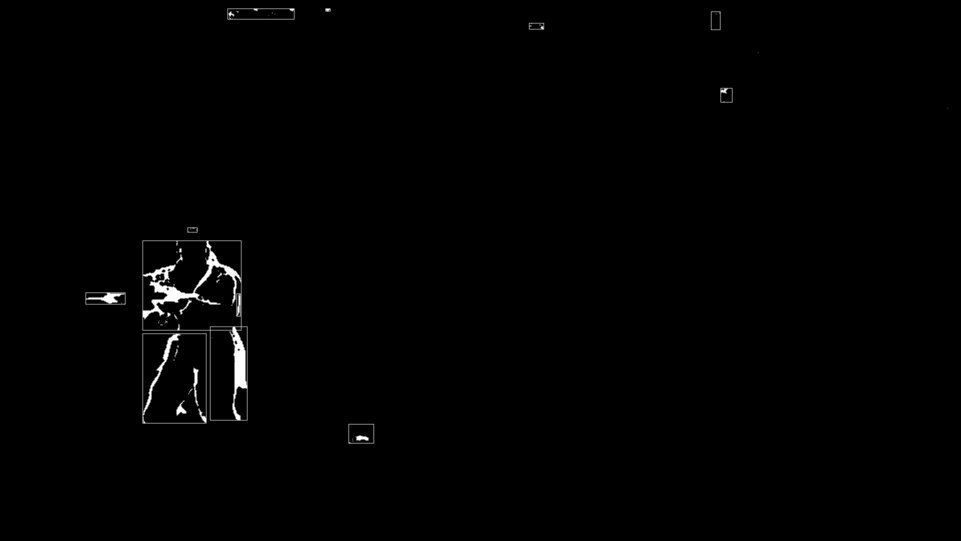

In [194]:
img_bound = draw_bounding_boxes(merged_boxes, img_erosion1, 1)

In [195]:
function remove_nested_boxes(bounding_boxes::Vector{T}) where T<:Tuple
    # Creamos una lista para almacenar las bounding boxes que no están dentro de otras
    non_nested_boxes = Vector{T}()

    # Iteramos sobre todas las bounding boxes
    for box1 in bounding_boxes
        nested = false

        # Verificamos si la bounding box actual está dentro de otra
        for box2 in bounding_boxes
            if box1 != box2 && is_inside(box1, box2)
                nested = true
                break
            end
        end

        # Si la bounding box no está dentro de ninguna otra, la agregamos a la lista
        if !nested
            push!(non_nested_boxes, box1)
        end
    end

    return non_nested_boxes
end

# Función auxiliar para verificar si una bounding box está completamente contenida dentro de otra
function is_inside(box1, box2)
    x1, y1, x2, y2 = box1
    x3, y3, x4, y4 = box2
    return x1 >= x3 && y1 >= y3 && x2 <= x4 && y2 <= y4
end


is_inside (generic function with 1 method)

In [211]:
function join_near_bounding_boxes(bounding_boxes_list::Vector{T}, img, join_rate, color) where T<:Tuple
    # Creamos una lista para almacenar las bounding boxes unidas
    joined_boxes = Vector{T}()

    function increase_box(box, join_rate)
        
        x1, y1, x2, y2 = box
        width = x2 - x1
        height = y2 - y1

        reduce_x = width * join_rate
        reduce_y = height * join_rate

        new_x1 = max(1, ceil(x1 - reduce_x))
        new_y1 = max(1, ceil(y1 - reduce_y))
        new_x2 = min(size(img, 2), ceil(x2 + reduce_x))
        new_y2 = min(size(img, 1), ceil(y2 + reduce_y))

        # Convertir a enteros
        new_x1 = Int(new_x1)
        new_y1 = Int(new_y1)
        new_x2 = Int(new_x2)
        new_y2 = Int(new_y2)

        return (new_x1, new_y1, new_x2, new_y2)
    end    

    # Aumentamos ligeramente cada bounding box
    for box in bounding_boxes_list
        increased_box = increase_box(box, join_rate)
        push!(joined_boxes, increased_box)
    end

    # Función auxiliar para verificar si dos bounding boxes están superpuestas
    function is_overlapping(box1, box2)
        x1, y1, x2, y2 = box1
        x3, y3, x4, y4 = box2
        return (x1 <= x4 && x3 <= x2 && y1 <= y4 && y3 <= y2)
    end

    # Iteramos sobre todas las bounding boxes en la lista
    for box in joined_boxes
        # Flag para verificar si la bounding box actual se ha fusionado con otra
        joined = false

        # Iteramos sobre las bounding boxes unidas hasta ahora
        for (index, joined_box) in enumerate(joined_boxes)
            # Si la bounding box actual está superpuesta con alguna bounding box unida, fusionamos
            if is_overlapping(box, joined_box)
                # Fusionamos las bounding boxes
                new_box = (min(box[1], joined_box[1]), min(box[2], joined_box[2]), max(box[3], joined_box[3]), max(box[4], joined_box[4]))
                # Actualizamos la lista de bounding boxes unidas
                joined_boxes[index] = new_box
                # Marcamos la flag como verdadera para indicar que esta bounding box se ha fusionado
                joined = true
                break
            end
        end

        # Si la bounding box actual no se ha fusionado, la agregamos a la lista de bounding boxes unidas
        if !joined
            push!(joined_boxes, box)
        end
    end

    joined_boxes = remove_nested_boxes(joined_boxes)
    
    return joined_boxes
end


join_near_bounding_boxes (generic function with 1 method)

In [212]:
img_unida = join_near_bounding_boxes(merged_boxes, img_erosion1, 0.1, 1)

10-element Vector{Tuple}:
 (164, 583, 258, 611)
 (266, 455, 502, 864)
 (442, 15, 602, 41)
 (651, 17, 661, 23)
 (692, 845, 752, 890)
 (1056, 45, 1090, 60)
 (1421, 20, 1442, 63)
 (1439, 174, 1467, 207)
 (1516, 105, 1516, 105)
 (1895, 216, 1895, 216)

In [198]:
function bounding_box_density(bounding_boxes::Vector{T}, total_area::Int) where T
    # Initialize a vector to store bounding box densities
    box_densities = Float64[]
    
    # Calculate the density of each bounding box
    for bbox in bounding_boxes
        x1, y1, x2, y2 = bbox
        # Calculate the area of the bounding box
        bbox_area = (x2 - x1 + 1) * (y2 - y1 + 1)
        # Calculate the density of the bounding box
        density = bbox_area / total_area
        # Add the density to the vector of bounding box densities
        push!(box_densities, density)
    end
    
    return box_densities
end


bounding_box_density (generic function with 1 method)

In [213]:
total_image_area = size(img_erosion1, 1) * size(img_erosion1, 2)  # Calcular el área total de la imagen
densities = bounding_box_density(reduced_boxes, total_image_area)


9-element Vector{Float64}:
 0.000925925925925926
 0.0171875
 0.011111111111111112
 9.645061728395061e-5
 0.006799768518518518
 0.0009592013888888889
 0.0001880787037037037
 0.00033902391975308645
 0.0003356481481481481

In [200]:
function density_inside_bounding_box(bounding_boxes::Vector{T}, densities::Vector{Float64}) where T
    # Initialize a vector to store the densities inside each bounding box
    inside_densities = Float64[]
    
    # Iterate over each bounding box
    for (i, bbox) in enumerate(bounding_boxes)
        # Extract the coordinates of the bounding box
        x1, y1, x2, y2 = bbox
        
        # Extract the density of the bounding box
        density = densities[i]
        
        # Create a mask for the bounding box
        mask = zeros(Bool, size(densities))
        mask[y1:y2, x1:x2] .= true
        
        # Calculate the density inside the bounding box
        inside_density = sum(mask .* densities) / density
        
        # Add the inside density to the vector of inside densities
        push!(inside_densities, inside_density)
    end
    
    return inside_densities
end 

density_inside_bounding_box (generic function with 1 method)

In [201]:
#dentro de cada bounding box, la cantidad de blanco con respecto a todos los pixeles de la bounding box
function density_inside_each_bbox(bounding_boxes::Vector{T}, image) where T
    inside_densities = Float64[]

    for bbox in bounding_boxes
        x1, y1, x2, y2 = bbox
        auxiliar_img = image[y1:y2, x1:x2]
        size_total= (x2-x1)*(y2-y1)
        white_pixels = sum(auxiliar_img)
        density = white_pixels/size_total
        push!(inside_densities, density)

    end
    return inside_densities
end

density_inside_each_bbox (generic function with 1 method)

In [215]:
density_each_bbox= density_inside_each_bbox(reduced_boxes, img_erosion1)

9-element Vector{Float64}:
 0.34947716015410013
 0.1561977143181238
 0.08692209563190076
 0.1111111111111111
 0.1928746928746929
 0.10210526315789474
 0.10344827586206896
 0.013888888888888888
 0.12267080745341614

In [203]:
function wrapData(bounding_boxes::Vector{T}, hw_relations::Vector{Float64}, densities::Vector{Float64}) where T
    inputData = []
    
    for (i,box) in enumerate(bounding_boxes)
        x1, y1, x2, y2 = box
        boxCenter = (x1+x2)/2, (y1+y2)/2
        data = (boxCenter, hw_relations[i], densities[i])
        push!(inputData, data)
    end
    
    return inputData
end

wrapData (generic function with 1 method)

In [204]:
function getSizeRelation(bounding_boxes::Vector{T}) where T
    sizeRelations = Float64[]
    for box in bounding_boxes
        x1, y1, x2, y2 = box
        relation = (x2-x1)/(y2-y1)
        push!(sizeRelations, relation)
    end
    return sizeRelations

end

getSizeRelation (generic function with 1 method)

In [214]:
sizeRelations = getSizeRelation(reduced_boxes)

9-element Vector{Float64}:
 3.4347826086956523
 1.100558659217877
 0.7094972067039106
 2.111111111111111
 0.39572192513368987
 1.3157894736842106
 2.4166666666666665
 0.5
 0.8214285714285714

In [206]:
data = wrapData(reduced_boxes, sizeRelations, density_each_bbox)

9-element Vector{Any}:
 ((210.5, 596.5), 3.4347826086956523, 0.34947716015410013)
 ((383.5, 570.5), 1.100558659217877, 0.1561977143181238)
 ((348.5, 756.5), 0.7094972067039106, 0.08692209563190076)
 ((384.5, 459.5), 2.111111111111111, 0.1111111111111111)
 ((457.0, 746.5), 0.39572192513368987, 0.1928746928746929)
 ((722.0, 867.0), 1.3157894736842106, 0.10210526315789474)
 ((1072.5, 52.0), 2.4166666666666665, 0.10344827586206896)
 ((1431.0, 41.0), 0.5, 0.013888888888888888)
 ((1452.5, 190.0), 0.8214285714285714, 0.12267080745341614)